# Number of Fundings

2015 936
2016 993
2017 443


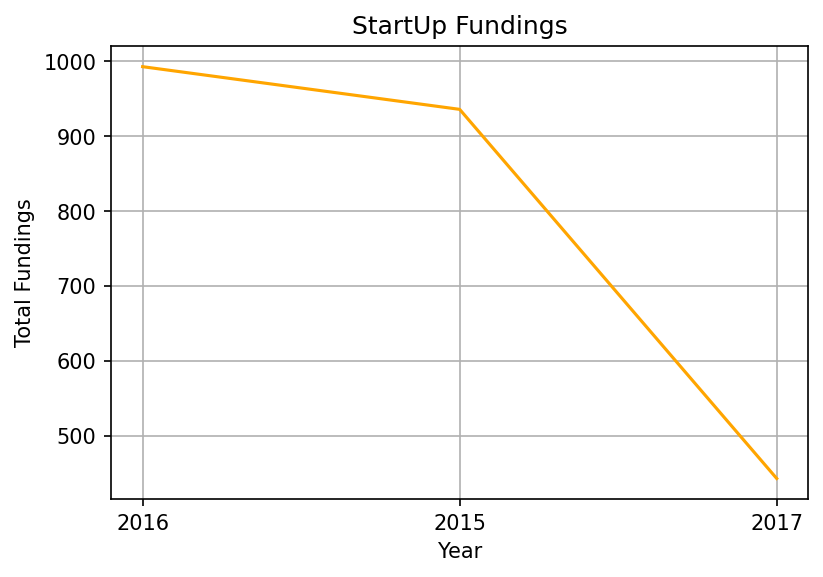

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
pd.options.mode.chained_assignment = None


csvDataFrame=pd.read_csv("C:\\Users\\welcome\\Downloads\\startup_funding.csv")
df=csvDataFrame.copy()


with open("C:\\Users\\welcome\\Downloads\\startup_funding.csv") as csvfileobj:
    csvData=csv.DictReader(csvfileobj,skipinitialspace=True)
    yearArr=[]
    for d in csvData:
        yearValue=d["Date"].split("/")[-1]
        yearArr.append(yearValue)
        

npYear=np.array(yearArr,dtype=str)
df["year"]=npYear
correction=df.year.unique()[3:]
correctarr=(list(correction))
df.year[(df.year == correction[0])] = correctarr[0].split(".")[1]
df.year[(df.year == correction[1])] = correctarr[1].split(".")[1]
df.year[(df.year == correction[2])] = correctarr[2].split(".")[1]


year=df.year.value_counts().index
totalFundings=df.year.value_counts().values

d={}
for y,f in zip(year,totalFundings):
    d[y]=f

for key in sorted(d.keys()):
    print(int(key),int(d[key]))

    
plt.figure(dpi=150)
plt.plot(year,totalFundings,color="orange")
plt.title("StartUp Fundings")
plt.xlabel("Year")
plt.ylabel("Total Fundings")
plt.grid()
plt.show()

# Question 2

Bangalore 635
Mumbai 449
New Delhi 389
Gurgaon 241
Pune 91
Noida 79
Hyderabad 77
Chennai 67
Ahmedabad 35
Jaipur 25


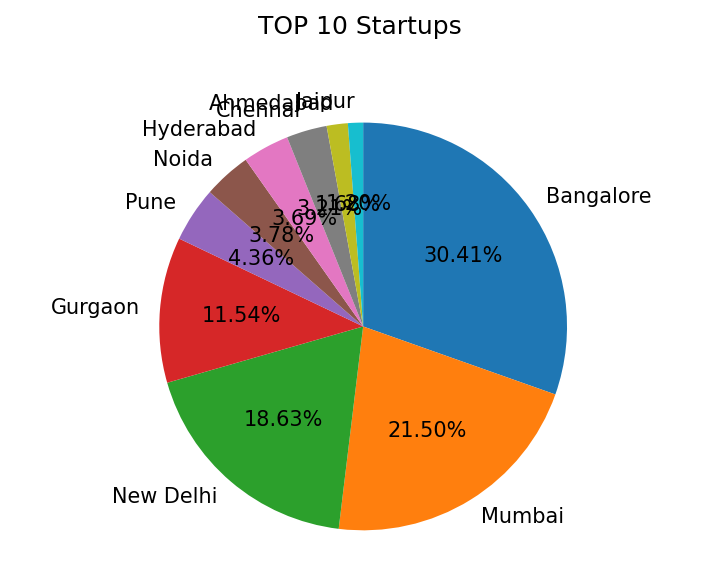

In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
pd.options.mode.chained_assignment = None


csvDataFrame=pd.read_csv("C:\\Users\\welcome\\Downloads\\startup_funding.csv")
df=csvDataFrame.copy()
df.CityLocation[df.CityLocation == "Delhi"] = "New Delhi"
df.CityLocation[df.CityLocation == "bangalore"]="Bangalore"

cityArr=df.CityLocation
newCityArr=[]

for c in cityArr:
    correction=str(c).split("/")[0].strip()
    newCityArr.append(correction)

newDataFrame=pd.DataFrame(data=newCityArr,columns=["city"])
newDataFrame.drop(newDataFrame[newDataFrame.city == "nan"].index,inplace=True)
top10City=newDataFrame.city.value_counts().index[:10]
top10Funding=newDataFrame.city.value_counts().values[:10]

d={}
for c,f in zip(top10City,top10Funding):
    d[c]=f
for key,val in d.items():
    print(str(key),int(val))

plt.figure(dpi=150)
plt.pie(top10Funding,labels=top10City,autopct="%.2f%%",counterclock=False,startangle=90)
plt.title("TOP 10 Startups \n\n")
plt.axis("equal")
plt.show()

# question 3

In [298]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
pd.options.mode.chained_assignment = None


csvDataFrame=pd.read_csv("C:\\Users\\welcome\\Downloads\\startup_funding.csv")
df=csvDataFrame.copy()

cityNameArr=df.CityLocation.values
fundingAmount=df.AmountInUSD.values

cityNameArr[cityNameArr == "Delhi"]="New Delhi"
cityNameArr[cityNameArr == "bangalore"] ="Bangalore"

modifiedCityName=[]
for i in list(cityNameArr):
    newCityName=str(i).split("/")[0].strip()
    modifiedCityName.append(newCityName)
modifiedCityName


newDataFrame=pd.DataFrame(data=modifiedCityName,columns=["City"])
newDataFrame["Amount"]=np.array(fundingAmount)
newDataFrame.dropna(inplace=True)
newDataFrame.drop(newDataFrame[newDataFrame.City == "nan"].index,inplace=True)

correctionAmount=newDataFrame.Amount.values
correctAmt=[]
for amt in correctionAmount:
    newAmt=int(str(amt).replace(",",""))
    correctAmt.append(newAmt)

del newDataFrame["Amount"]
newDataFrame["Amount"] = correctAmt

cityNameArr=newDataFrame.City.unique()

finalArr=[]

for city in cityNameArr:
    value = newDataFrame[newDataFrame.City == city].Amount.values.sum()
    finalArr.append((city,value))

cityFunds=sorted(finalArr,key=lambda x:x[1],reverse=True)
count=0
d={}
for city,amt in cityFunds:
    if count == 10:
        break
    d[city]=amt
    count+=1
totalSum=0
for key in d.keys():
    totalSum+=int(d[key])

for key in d.keys():
    print(key,"%.2f"%((d[key]/totalSum)*100))


Bangalore 49.71
New Delhi 16.63
Mumbai 13.90
Gurgaon 12.21
Chennai 2.43
Pune 2.16
Hyderabad 1.15
Noida 1.01
Ahmedabad 0.58
Jaipur 0.21


# Question 4

Private Equity 98.15
Seed Funding 1.81
Debt Funding 0.04
Crowd Funding 0.00


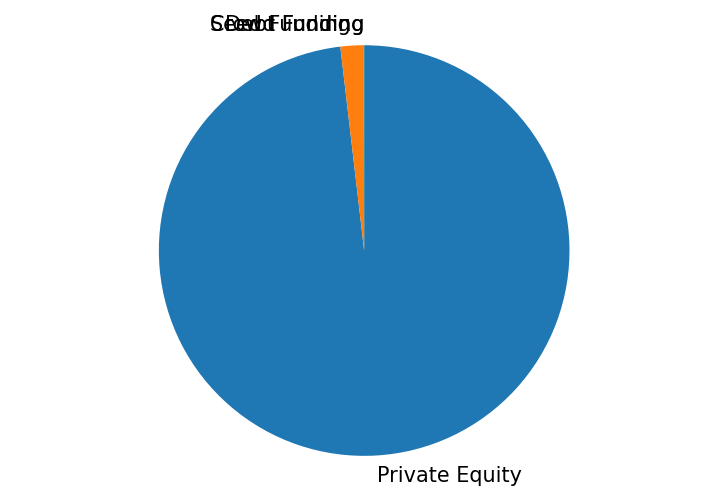

In [360]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
pd.options.mode.chained_assignment = None


csvDataFrame=pd.read_csv("C:\\Users\\welcome\\Downloads\\startup_funding.csv")
df=csvDataFrame.copy()


df.InvestmentType[df.InvestmentType == "SeedFunding"] = "Seed Funding"
df.InvestmentType[df.InvestmentType == "PrivateEquity"] = "Private Equity"
df.InvestmentType[df.InvestmentType == "Crowd funding"]="Crowd Funding"

investmentType=df.InvestmentType.values
amountFunding=df.AmountInUSD.values

newDataFrame=pd.DataFrame(data=investmentType,columns=["invstType"])
newDataFrame["Amount"]=amountFunding
newDataFrame.dropna(inplace=True)


amountFunding=newDataFrame.Amount.values
intAmount=[]
for amt in amountFunding:
    newAmount=int(str(amt).replace(",",""))
    intAmount.append(newAmount)

newDataFrame.pop("Amount")
newDataFrame["Amount"]=intAmount

uniqType=newDataFrame.invstType.unique()

typeVSamt=[]
for typ in uniqType:
    amount=newDataFrame.Amount[newDataFrame.invstType == typ].values.sum()
    typeVSamt.append((typ,amount))
    
typeVSamt=sorted(typeVSamt,key=lambda x:x[1],reverse=True)
typeOfInvestment=[]
amountOfFunding=[]
d={}
totalSum=0
for typ,amount in typeVSamt:
    d[typ]=amount
    totalSum+=amount
    typeOfInvestment.append(typ)
    amountOfFunding.append(amount)

for key in d:
    print(key,"%.2f"%((d[key]/totalSum)*100))

plt.figure(dpi=150)
plt.pie(amountOfFunding,labels=typeOfInvestment,counterclock=False,startangle=90)
plt.axis("equal")
plt.show()

# Question 5

In [416]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
pd.options.mode.chained_assignment = None


csvDataFrame=pd.read_csv("C:\\Users\\welcome\\Downloads\\startup_funding.csv")
df=csvDataFrame.copy()
df.IndustryVertical[(df.IndustryVertical == "ecommerce") | (df.IndustryVertical == "eCommerce")|(df.IndustryVertical == "ECommerce")] = "Ecommerce"
IndustryName=df.IndustryVertical.values

newDataFrame=pd.DataFrame(IndustryName,columns=["Industry"])
newDataFrame["Amount"] = df.AmountInUSD
newDataFrame.dropna(inplace=True)
IncorrectAmount=newDataFrame.Amount.values
CorrectAmount=[]
for amt in IncorrectAmount:
    crtAmt=int(str(amt).replace(",",""))
    CorrectAmount.append(crtAmt)
newDataFrame.pop("Amount")
newDataFrame["Amount"] = CorrectAmount

unikIndust=newDataFrame.Industry.unique()

indVsAmt=[]
for ind in unikIndust:
    amt=newDataFrame.Amount[newDataFrame.Industry == ind].values.sum()
    indVsAmt.append((ind,amt))

indVsAmt=sorted(indVsAmt,key=lambda x:x[1],reverse=True)
indVsAmt=indVsAmt[:5]

totalSum=0
d={}
industryArray=[]
amountInvested=[]
for ind,amt in indVsAmt:
    d[ind]=amt
    industryArray.append(ind)
    amountInvested.append(amt)
    totalSum+=amt
    
for key in d:
    print(key,"%.2f"%((d[key]/totalSum)*100))


Ecommerce 40.53
Consumer Internet 35.95
Technology 10.45
Online Marketplace 6.63
E-Commerce & M-Commerce platform 6.44


# Question 6

In [470]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
pd.options.mode.chained_assignment = None


csvDataFrame=pd.read_csv("C:\\Users\\welcome\\Downloads\\startup_funding.csv")
df=csvDataFrame.copy()
Startuparr=df.StartupName.unique()

olaIncrtArr=[]
PaytmincrtArr=[]
oyoIncrtArr=[]
flipkartIncrtArr=[]
for i in Startuparr:
    if "Ola" in i:
        olaIncrtArr.append(i)
    if "Paytm" in i:
        PaytmincrtArr.append(i)
    if "Oyo" in i:
        oyoIncrtArr.append(i)
    if "Flipkart" in i:
        flipkartIncrtArr.append(i)
        
df.StartupName[(df.StartupName).isin(olaIncrtArr)]="Ola"
df.StartupName[(df.StartupName).isin(PaytmincrtArr)]="Paytm"
df.StartupName[(df.StartupName).isin(oyoIncrtArr)]="Oyo"
df.StartupName[(df.StartupName).isin(flipkartIncrtArr)]="Flipkart"

StartupNameArr=df.StartupName.values
AmountArr=df.AmountInUSD

newDF=pd.DataFrame(StartupNameArr,columns=["StartupName"])
newDF["Amount"] = AmountArr
newDF.dropna(inplace=True)

incorrectAmmount=newDF.Amount.values
CorrectAmount=[]
for i in  incorrectAmmount:
    crtAmt=int(str(i).replace(",",""))
    CorrectAmount.append(crtAmt)

newDF.pop("Amount")
newDF["Amount"] = CorrectAmount

unikStartup=newDF.StartupName.unique()

strtupVsAmt=[]
for strtup in unikStartup:
    amt=newDF.Amount[newDF.StartupName == strtup].values.sum()
    strtupVsAmt.append((strtup,amt))
strtupVsAmt=sorted(strtupVsAmt,key=lambda x:x[1],reverse=True)
strtupVsAmt=strtupVsAmt[:5]
for strtup,amt in strtupVsAmt:
    print(strtup)

Paytm
Flipkart
Ola
Snapdeal
Oyo


# Question 7

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
pd.options.mode.chained_assignment = None


csvDataFrame=pd.read_csv("C:\\Users\\welcome\\Downloads\\startup_funding.csv")
df=csvDataFrame.copy()
Startuparr=df.StartupName.unique()

olaIncrtArr=[]
PaytmincrtArr=[]
oyoIncrtArr=[]
flipkartIncrtArr=[]
for i in Startuparr:
    if "Ola" in i.capitalize():
        olaIncrtArr.append(i)
    if "Paytm" in i.capitalize():
        PaytmincrtArr.append(i)
    if "Oyo" in i.capitalize():
        oyoIncrtArr.append(i)
    if "Flipkart" in i.capitalize():
        flipkartIncrtArr.append(i)

oyoIncrtArr.pop(3)
df.StartupName[(df.StartupName).isin(olaIncrtArr)]="Ola"
df.StartupName[(df.StartupName).isin(PaytmincrtArr)]="Paytm"
df.StartupName[(df.StartupName).isin(oyoIncrtArr)]="Oyo"
df.StartupName[(df.StartupName).isin(flipkartIncrtArr)]="Flipkart"


df=df.groupby(by="StartupName").size()
StartupName=df.nlargest(5).index
fundingRound=df.nlargest(5).values

for s,r in zip(StartupName,fundingRound):
    print(s,int(r))

Ola 9
Swiggy 7
Oyo 6
Paytm 6
UrbanClap 6


# Top Investor

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
pd.options.mode.chained_assignment = None


csvDataFrame=pd.read_csv("C:\\Users\\welcome\\Downloads\\startup_funding.csv")
df=csvDataFrame.copy()

investorsArr=df.InvestorsName.values
newInvestor=[]
for i in investorsArr:
    if not("undisclosed" in str(i) or "Undisclosed" in str(i)):
        arr=str(i).split(",")
        for k in arr:
            newInvestor.append(k.strip())
            
newDataFrame=pd.DataFrame(newInvestor,columns=["Names"])
vals=newDataFrame.groupby(by="Names").size().values
inds=newDataFrame.groupby(by="Names").size().index

invstVsnum=[]
for i,v in zip(inds,vals):
    invstVsnum.append((i,v))

invstVsnum=sorted(invstVsnum,key=lambda x:x[1],reverse=True)

topInvestor,NumberofFundings=invstVsnum[0]
print(topInvestor,int(NumberofFundings))

Sequoia Capital 64
